In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

### EDA

In [3]:
data=pd.read_csv('data/Clean_Dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.shape

(300153, 12)

In [5]:
data.size

3601836

In [6]:
data.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
data.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [10]:
categorical_columns = ['airline', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class','flight','source_city']
encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [11]:
data.dtypes

airline               int32
flight                int32
source_city           int32
departure_time        int32
stops                 int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object

In [12]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


### Outlier Detection

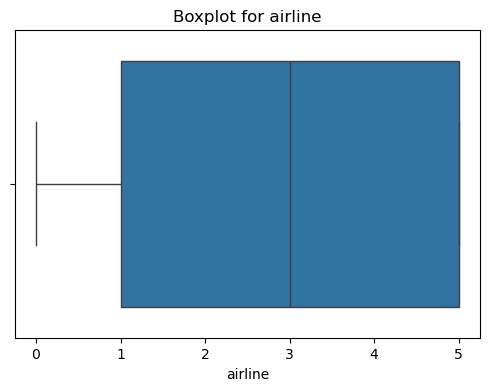

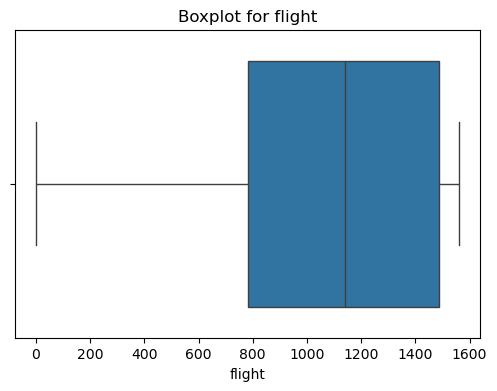

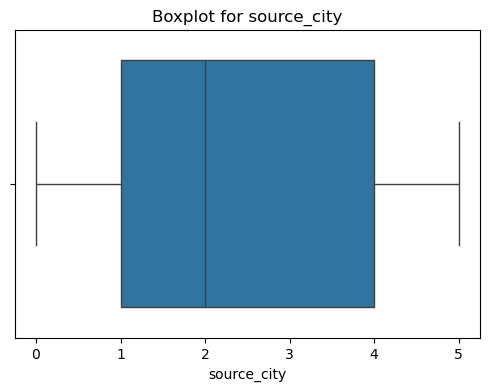

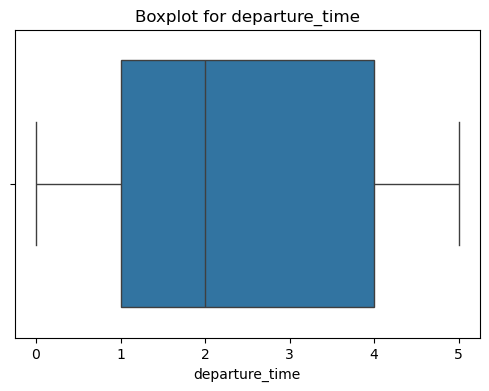

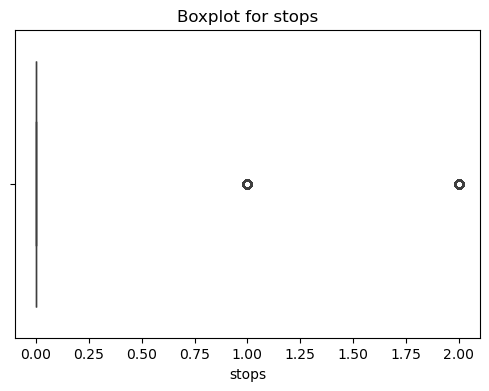

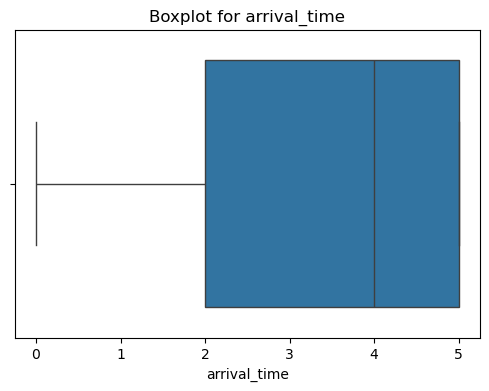

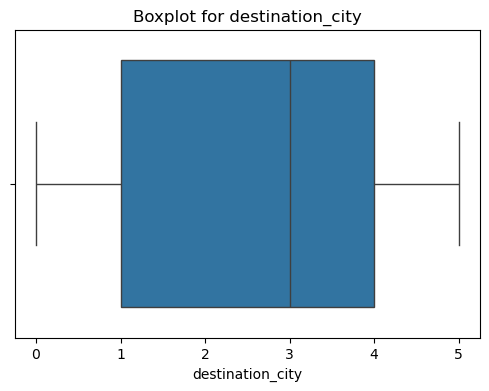

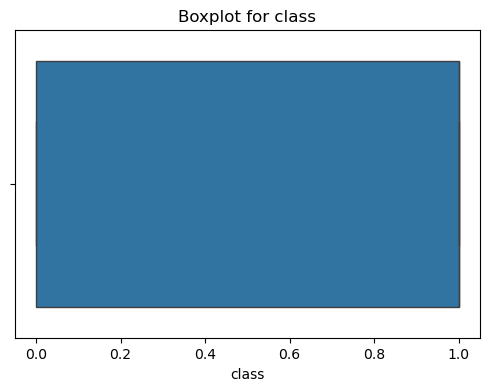

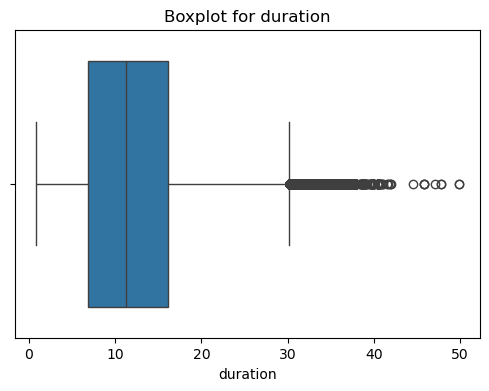

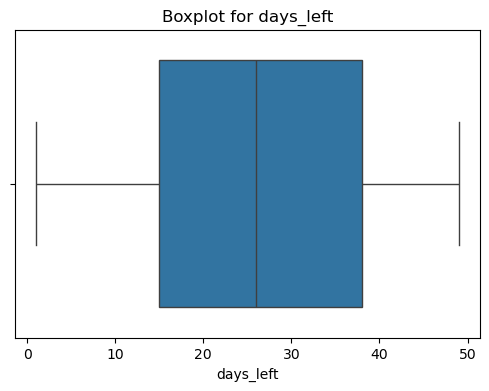

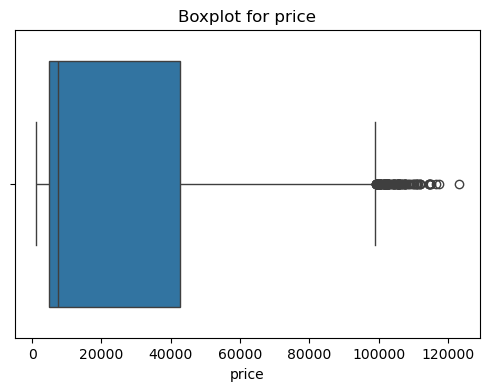

In [14]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [15]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   airline  flight  source_city  departure_time  stops  arrival_time  \
0        4    1408            2               2      0             5   
1        4    1387            2               1      0             4   
2        0    1213            2               1      0             1   
3        5    1559            2               4      0             0   
4        5    1549            2               4      0             4   

   destination_city  class  duration  days_left  price  
0                 5      1      2.17          1   5953  
1                 5      1      2.33          1   5953  
2                 5      1      2.17          1   5956  
3                 5      1      2.25          1   5955  
4                 5      1      2.33          1   5955  


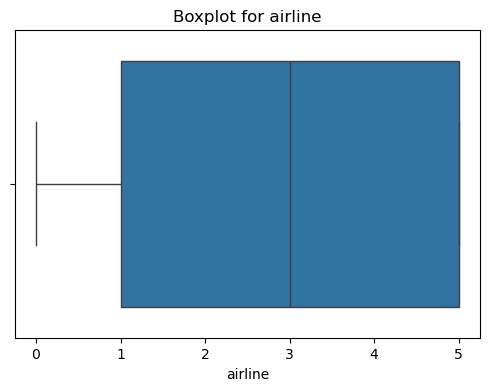

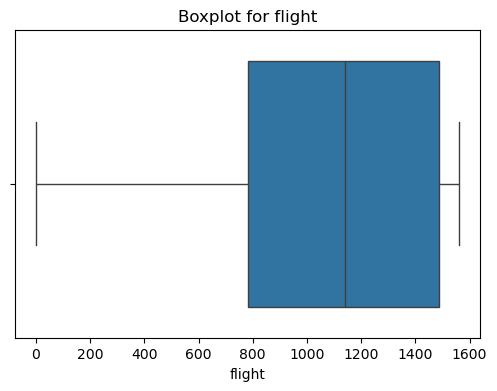

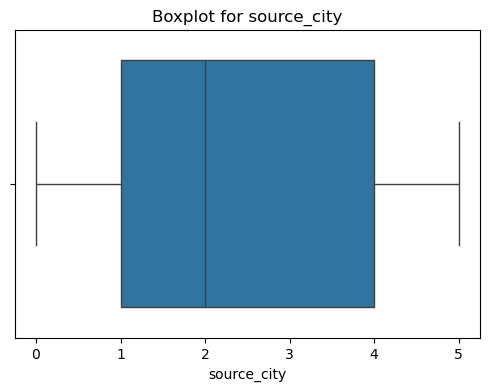

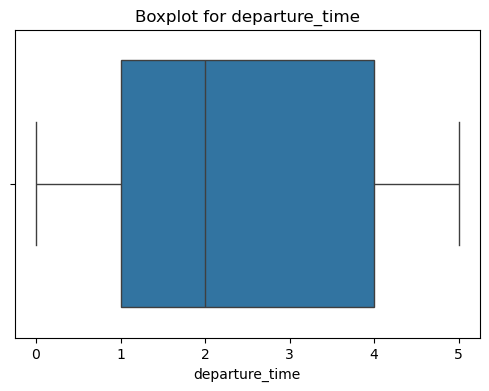

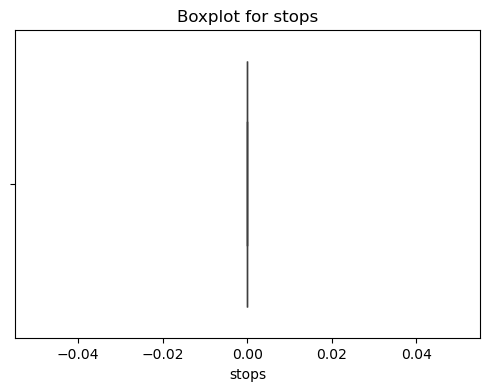

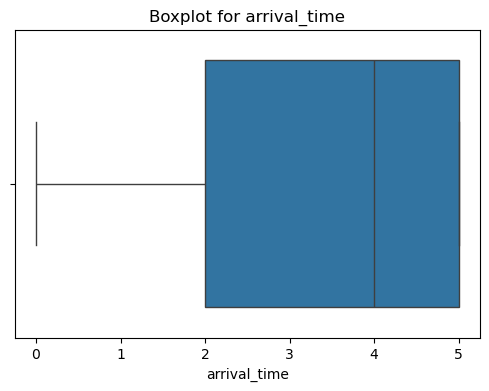

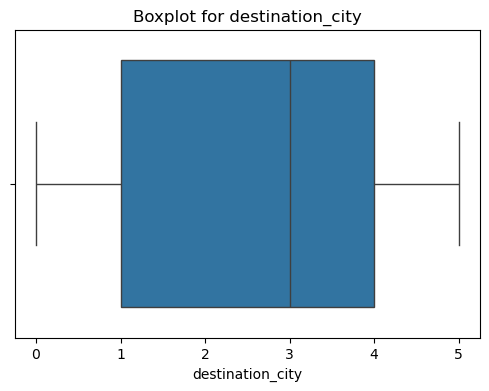

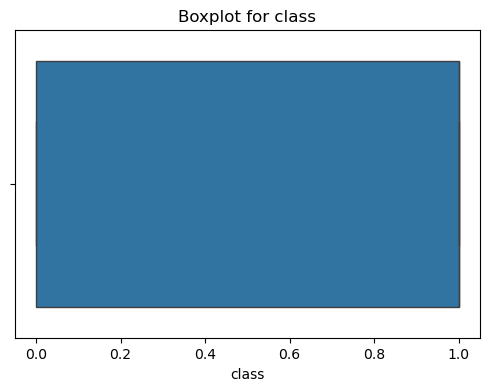

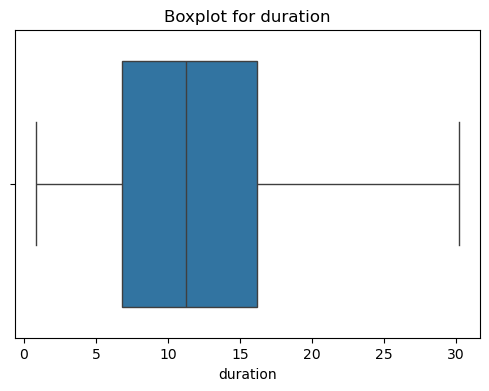

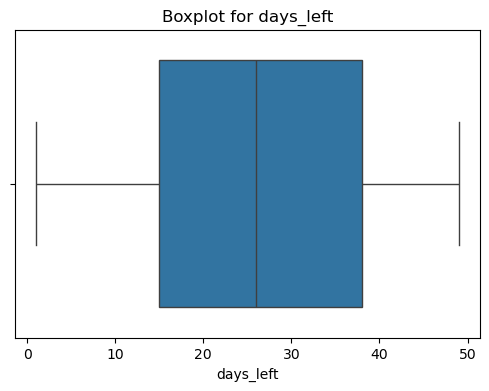

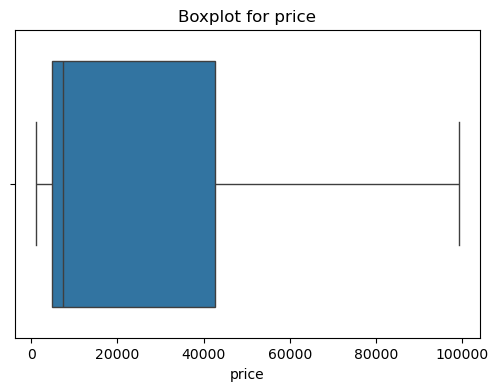

In [16]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Splitting dataset

In [18]:
X = data.drop(columns=['price', 'flight'])
y = data['price']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modeling

In [20]:
regressors = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=47, random_state=34),
    'Linear Regression': LinearRegression(),
    # 'Support Vector Regressor (SVR)': SVR(kernel='linear'),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42, max_depth=5),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=50, random_state=42, learning_rate=0.3)
}

# Train and evaluate each regressor
for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  Mean Squared Error: {mse:.2f}')
    print(f'  R^2 Score: {r2:.2f}')
    print('-' * 50)

Random Forest Regressor:
  Mean Squared Error: 7950595.58
  R^2 Score: 0.98
--------------------------------------------------
Linear Regression:
  Mean Squared Error: 52425984.97
  R^2 Score: 0.90
--------------------------------------------------
KNN Regressor:
  Mean Squared Error: 13906602.89
  R^2 Score: 0.97
--------------------------------------------------
Decision Tree Regressor:
  Mean Squared Error: 28837003.42
  R^2 Score: 0.94
--------------------------------------------------
AdaBoost Regressor:
  Mean Squared Error: 33768433.85
  R^2 Score: 0.93
--------------------------------------------------


In [ ]:
regressors = {
    'Support Vector Regressor (SVR)': SVR(),
}

# Train and evaluate each regressor
for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  Mean Squared Error: {mse:.2f}')
    print(f'  R^2 Score: {r2:.2f}')
    print('-' * 50)

In [35]:
#END